Name: **Rubaiyat Karim**\
ID: **2215151022**\
Section: **7A1**\
Course: **Simulation & Modeling LAB**

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Task
### Generate two sets of from a normal distribution and perform a two-sample t-test.
- Randomly generate 50 values from a normal distribution with a chosen mean (μ1) and standard deviation.
- Randomly generate 50 values from a normal distribution with a different mean (μ2) and standard deviation.

**Use and determine whether the means differ significantly.**

Mean of Set X: 49.63
Mean of Set Y: 52.21
T-Value: -1.24
Degrees of Freedom: 91.22
P-Value: 0.2179
95% Confidence Interval: [-6.70, 1.55]


Result: The null hypothesis is not rejected. No significant difference between the groups.


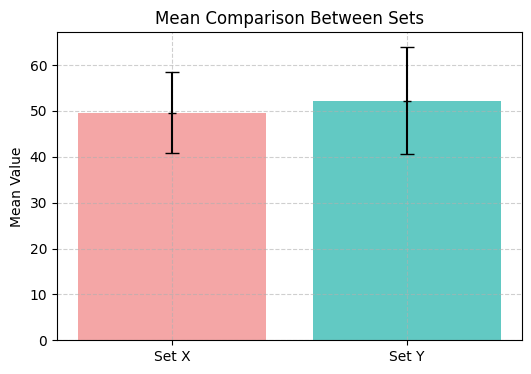

In [4]:
mu_x, sigma_x = 50, 10
mu_y, sigma_y = 55, 12

sample_x = np.random.normal(mu_x, sigma_x, 50)
sample_y = np.random.normal(mu_y, sigma_y, 50)

t_value, p_value = stats.ttest_ind(sample_x, sample_y, equal_var=False)

ean_diff = np.mean(sample_x) - np.mean(sample_y)
std_err = np.sqrt(np.var(sample_x, ddof=1)/len(sample_x) + np.var(sample_y, ddof=1)/len(sample_y))
df = (std_err**4) / ((np.var(sample_x, ddof=1)/len(sample_x))**2 / (len(sample_x)-1) + (np.var(sample_y, ddof=1)/len(sample_y))**2 / (len(sample_y)-1))
conf_interval = stats.t.interval(0.95, df, loc=mean_diff, scale=std_err)

print(f"Mean of Set X: {np.mean(sample_x):.2f}")
print(f"Mean of Set Y: {np.mean(sample_y):.2f}")
print(f"T-Value: {t_value:.2f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"95% Confidence Interval: [{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]")
print('\n')

alpha = 0.05
if p_value < alpha:
    print("Result: The null hypothesis is rejected. The groups have a significant difference.")
else:
    print("Result: The null hypothesis is not rejected. No significant difference between the groups.")

plt.figure(figsize=(6, 4))
plt.bar(['Set X', 'Set Y'], [np.mean(sample_x), np.mean(sample_y)], color=['lightcoral', 'lightseagreen'], alpha=0.7)
plt.errorbar(['Set X', 'Set Y'], [np.mean(sample_x), np.mean(sample_y)], yerr=[np.std(sample_x, ddof=1), np.std(sample_y, ddof=1)], fmt='k_', capsize=5)
plt.title('Mean Comparison Between Sets')
plt.ylabel('Mean Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()